# Analysis

In [1]:
import os
import sys
from tqdm import tqdm
from collections import Counter
import numpy as np
import operator
import statistics

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.util import load_json
import matplotlib.pyplot as plt

In [2]:
train_contexts_path = '../data/processed/train_contexts.json'
train_answers_path = '../data/processed/train_answers.json'
val_contexts_path = '../data/processed/dev_contexts.json'
val_answers_path = '../data/processed/dev_answers.json'

In [3]:
train_contexts, train_answers = load_json(train_contexts_path), load_json(train_answers_path)
val_contexts, val_answers = load_json(val_contexts_path), load_json(val_answers_path)

## Context, Question and Answer Lengths

In [4]:
def bar(title, counter, fig_size=(60, 10), tick_font=10):
    fig = plt.figure(figsize=fig_size, dpi=180, facecolor='w', edgecolor='k')
    top = dict(sorted(counter.items(), key=operator.itemgetter(1), reverse=True)[0:400])

    plt.bar(range(len(top)), top.values(), align='center')
    plt.xticks(range(len(top)), sorted([int(key) for key in top.keys()]), fontsize=tick_font)
    plt.xlabel('Length', fontsize=15)
    plt.ylabel('Occurrence', fontsize=15)
    plt.title(title)

    plt.show()
    
def stats(counter):
    lengths = [int(key) for key in counter.keys()]
    min_length = min(lengths)
    max_length = max(lengths)
    median = statistics.median(lengths)
    mean = statistics.mean(lengths)
    return min_length, max_length, median, mean
    
def count(data, token_key):
    counter = Counter()
    for key, value in data.items():
        length = data[key][token_key]
        counter[str(length)] += 1
    return counter

def count_answer_lengths(data):
    counter = Counter()
    for key, value in data.items():
        start = data[key]['answer_starts']
        end = data[key]['answer_ends']
        length = end - start
        counter[str(length)] += 1
    return counter

In [5]:
train_context_lengths = count(train_contexts, 'context_length')
val_context_lengths = count(val_contexts, 'context_length')
train_question_lengths = count(train_answers, 'query_length')
val_question_lengths = count(val_answers, 'query_length')
train_answer_lengths = count_answer_lengths(train_answers)
val_answer_lengths = count_answer_lengths(val_answers)

## Contexts

### Train Contexts

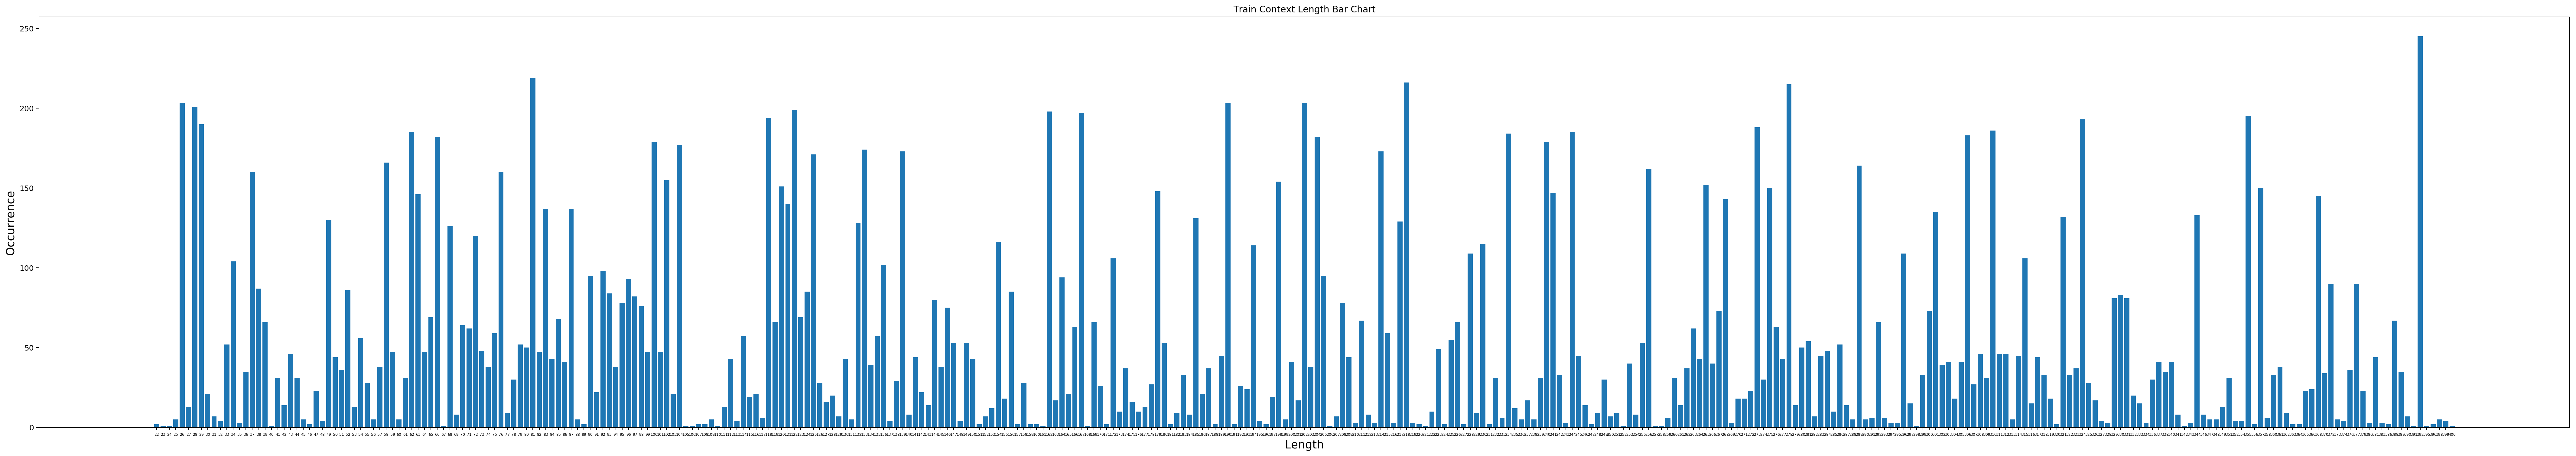

In [6]:
bar('Train Context Length Bar Chart', train_context_lengths, tick_font=5)

In [7]:
stats(train_context_lengths)

(22, 400, 202, 203.06371191135733)

### Val Contexts

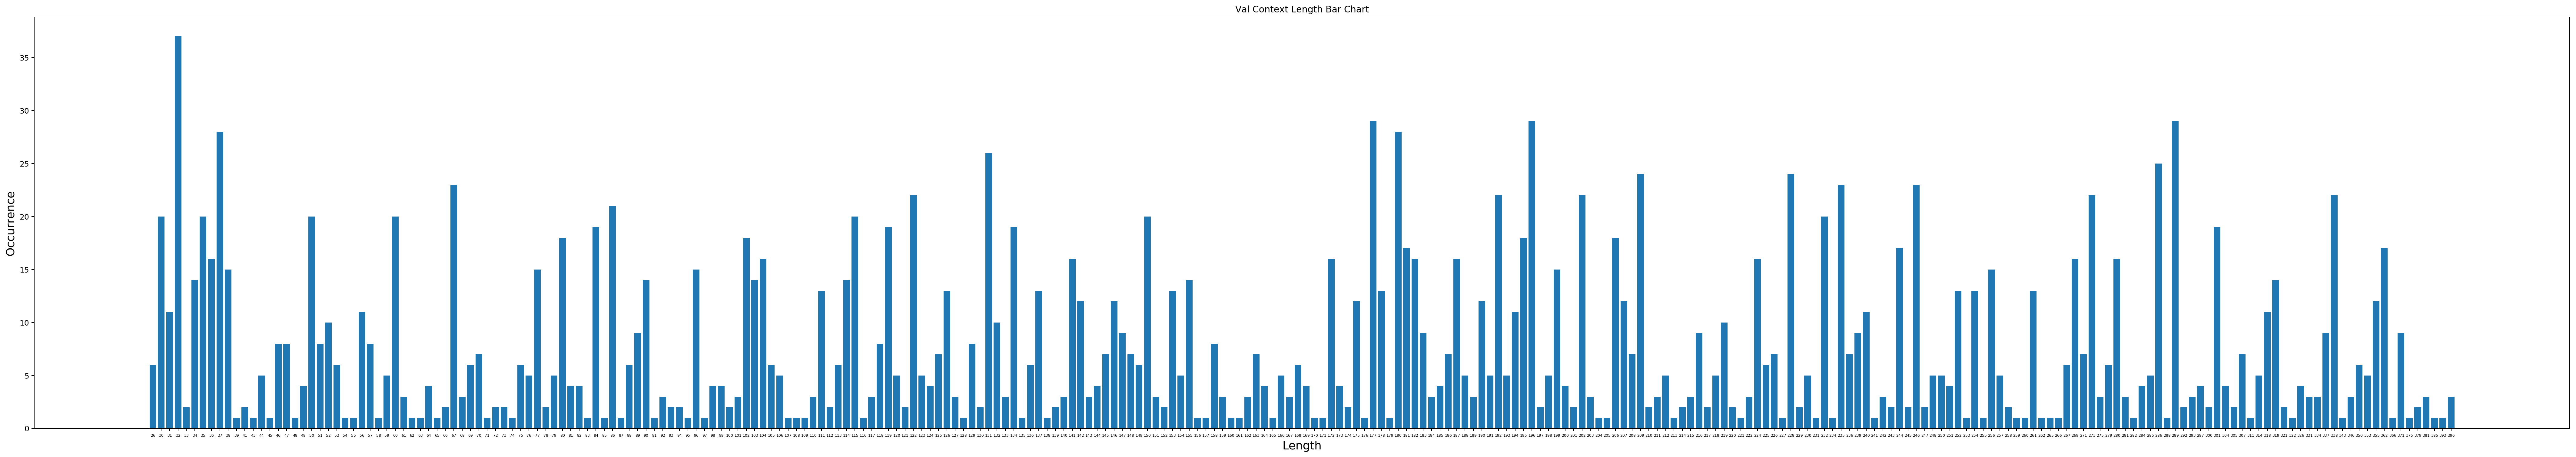

In [8]:
bar('Val Context Length Bar Chart', val_context_lengths, tick_font=5)

In [9]:
stats(val_context_lengths)

(26, 396, 168.5, 175.17028985507247)

## Questions

### Train

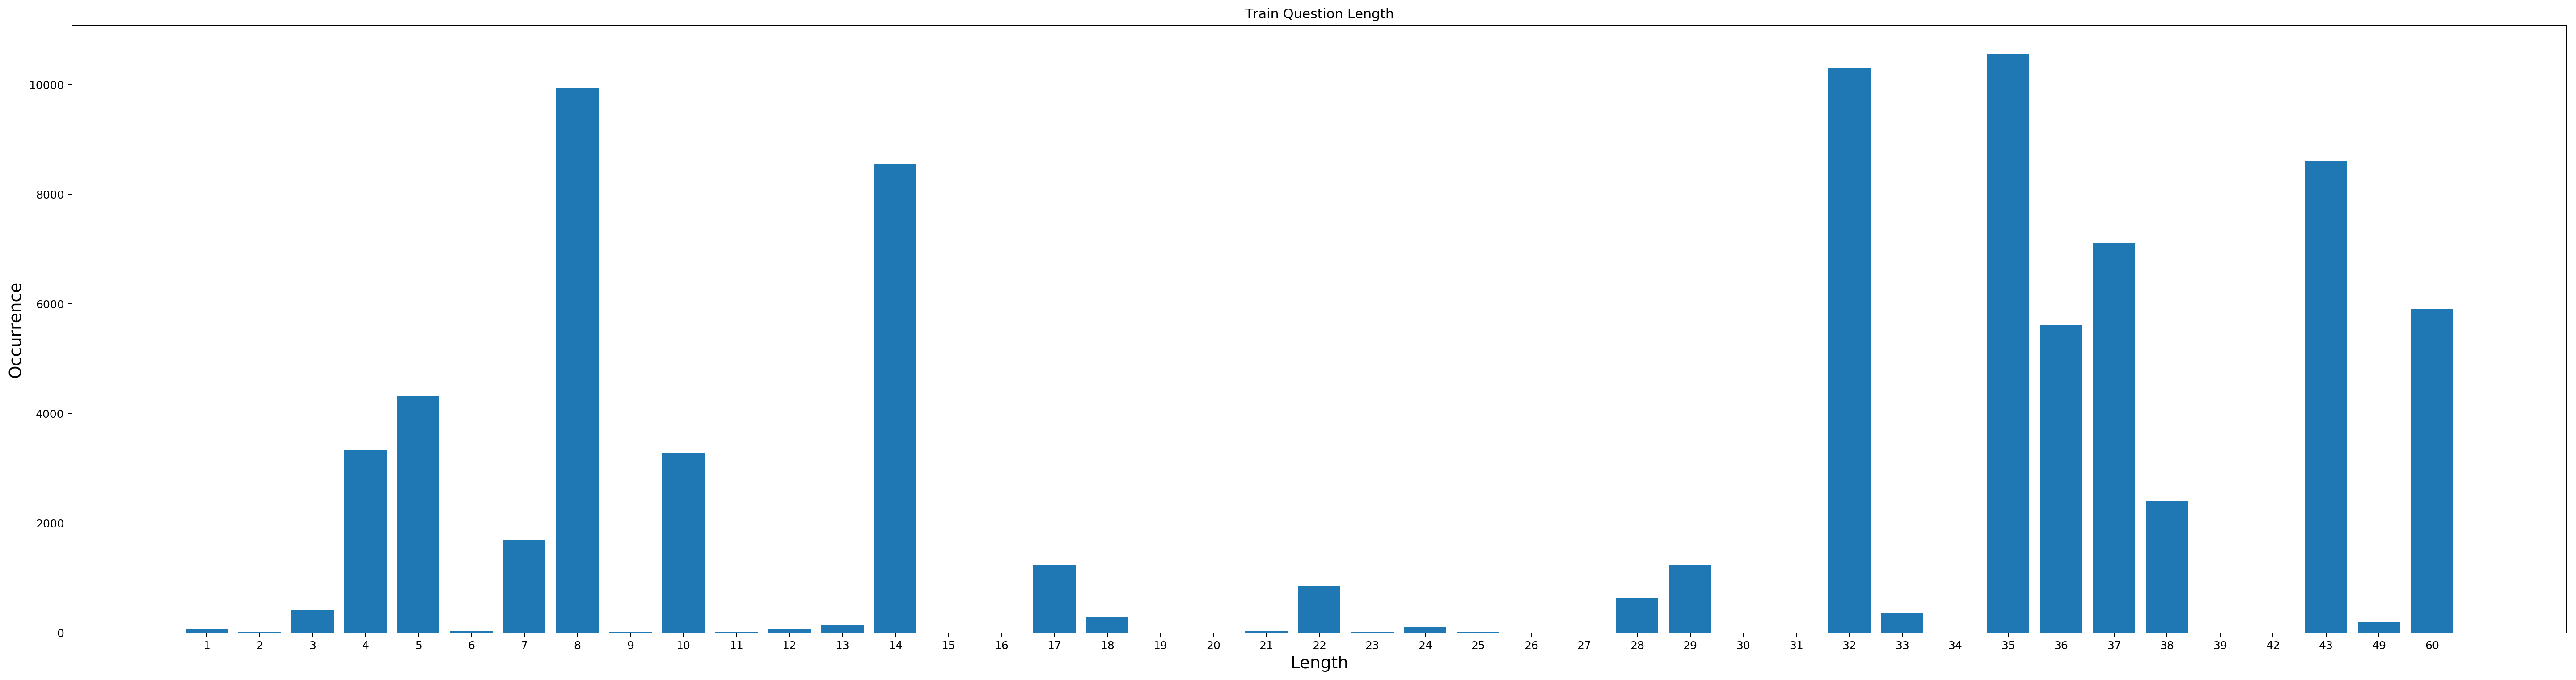

In [10]:
bar('Train Question Length', train_question_lengths, fig_size=(40, 10))

In [11]:
stats(train_question_lengths)

(1, 60, 22, 22.651162790697676)

### Val Questions

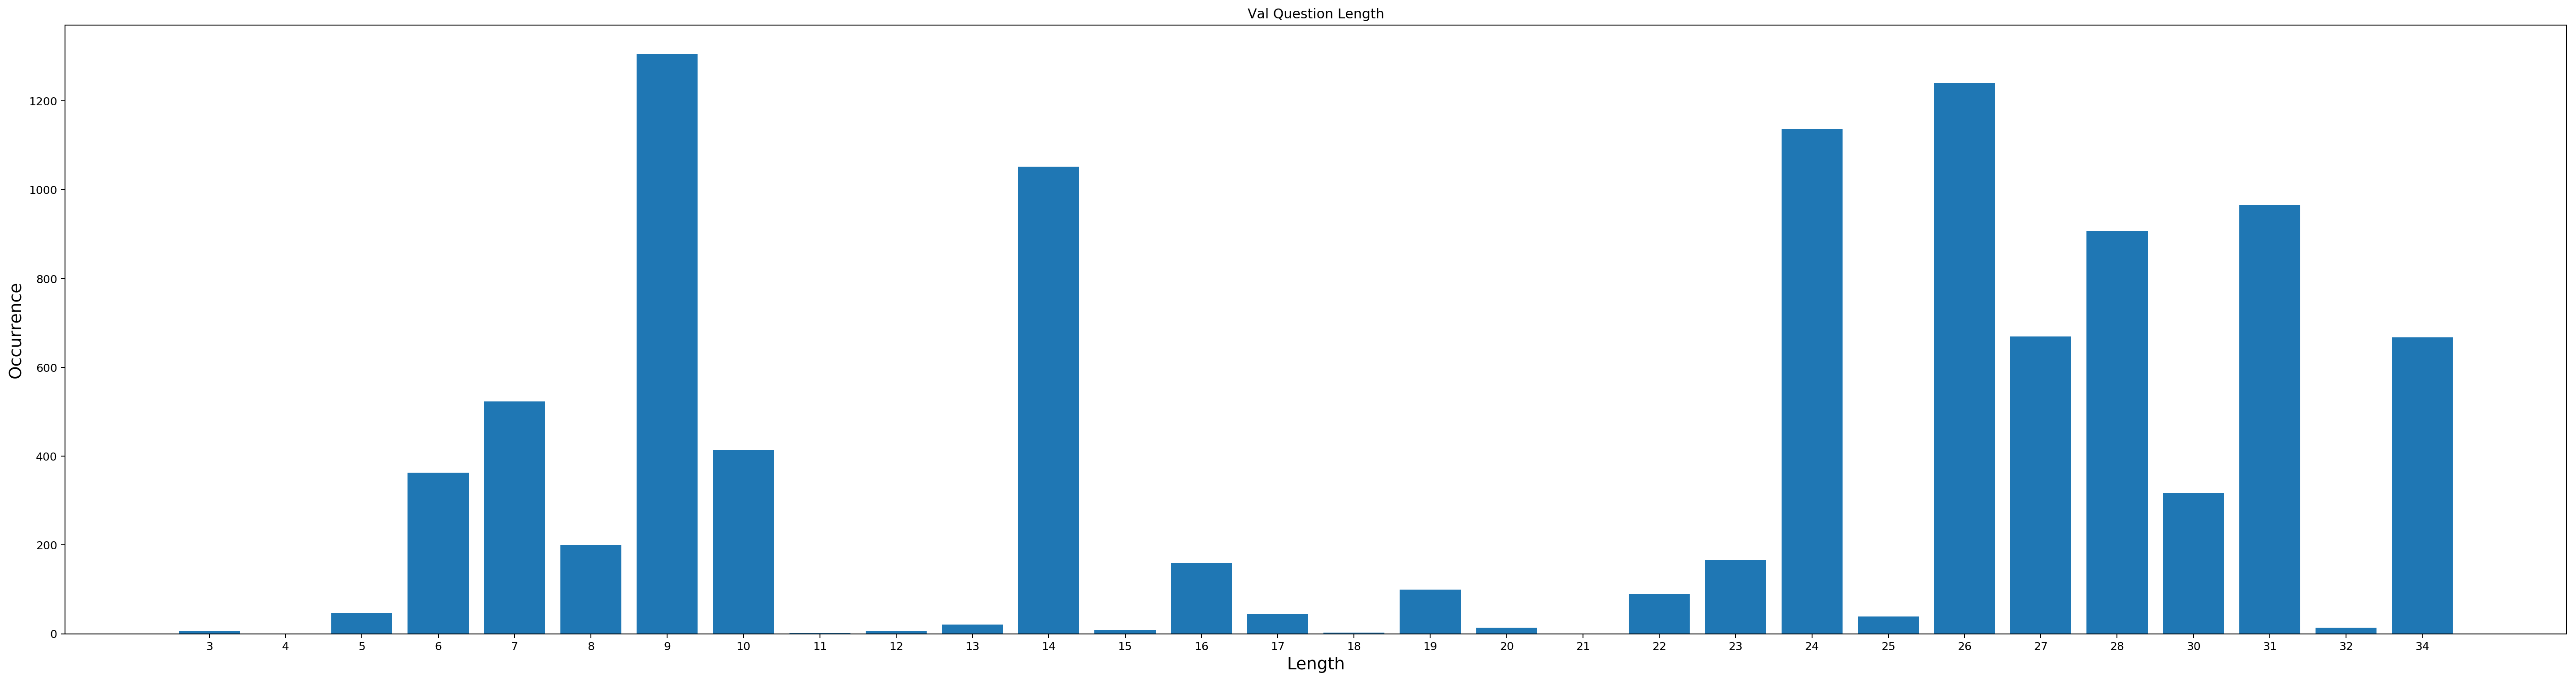

In [12]:
bar('Val Question Length', val_question_lengths, fig_size=(40, 10))

In [13]:
stats(val_question_lengths)

(3, 34, 17.5, 17.666666666666668)

## Answers

### Train

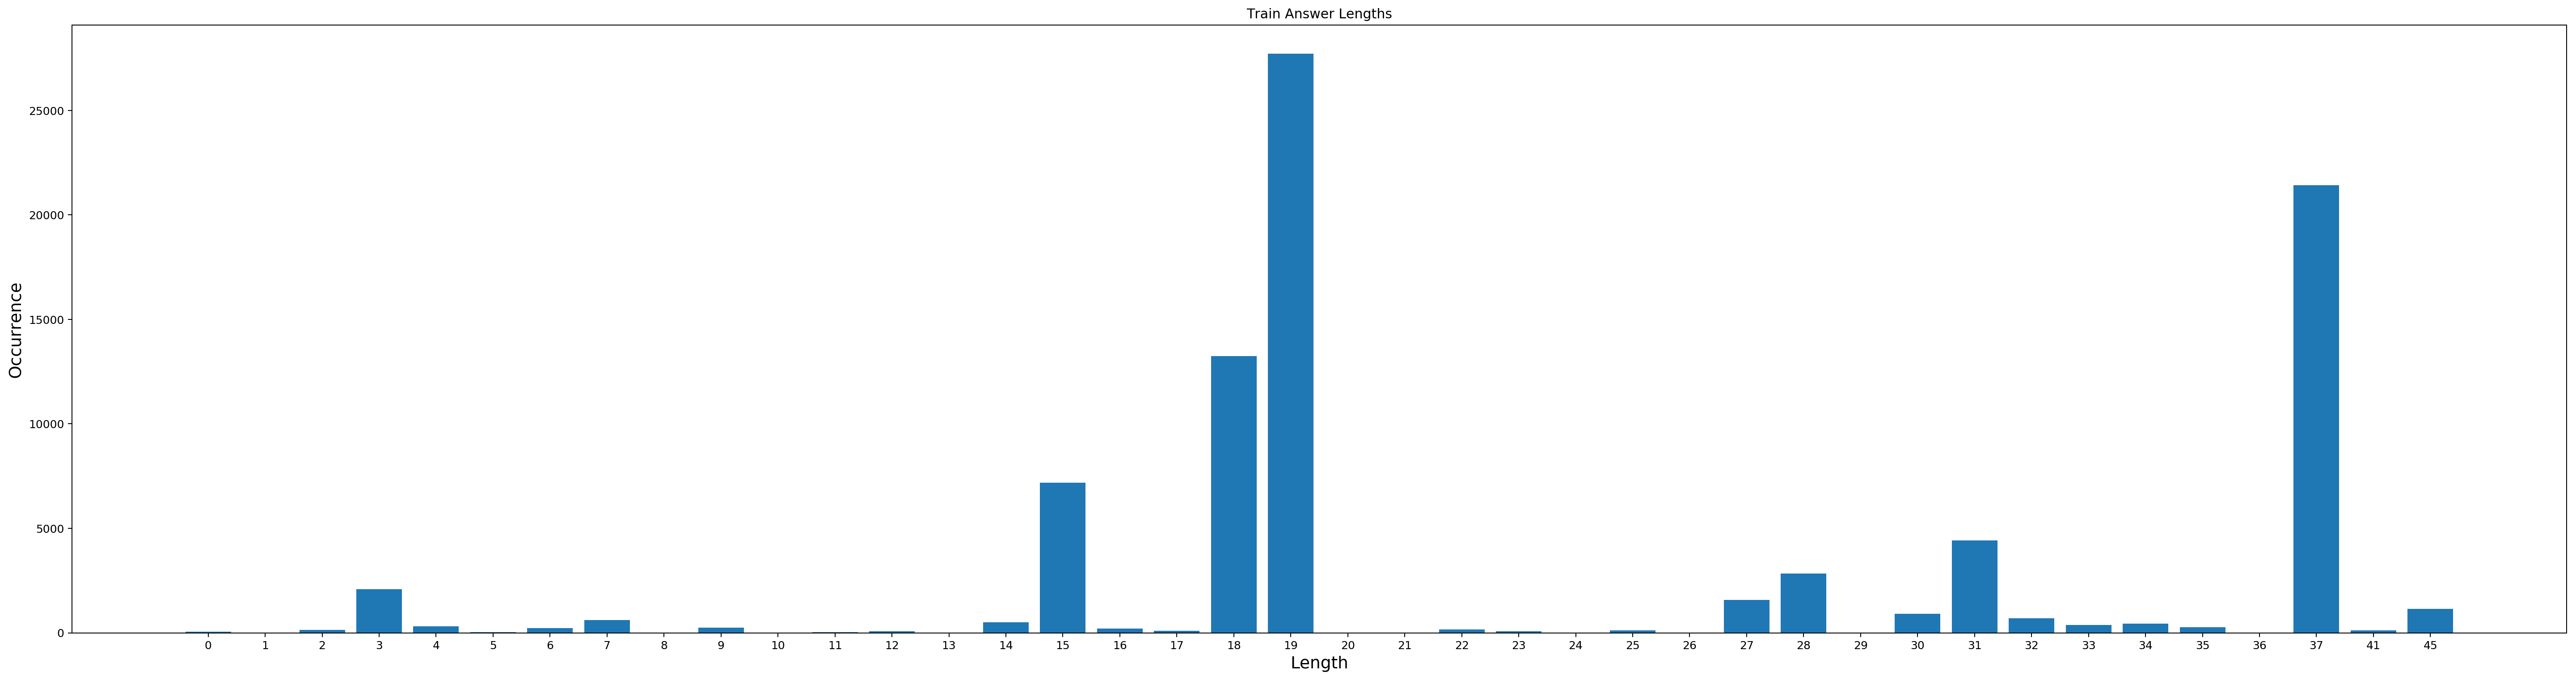

In [14]:
bar('Train Answer Lengths', train_answer_lengths, fig_size=(40, 10))

In [15]:
stats(train_answer_lengths)

(0, 45, 19.5, 19.725)

### Val

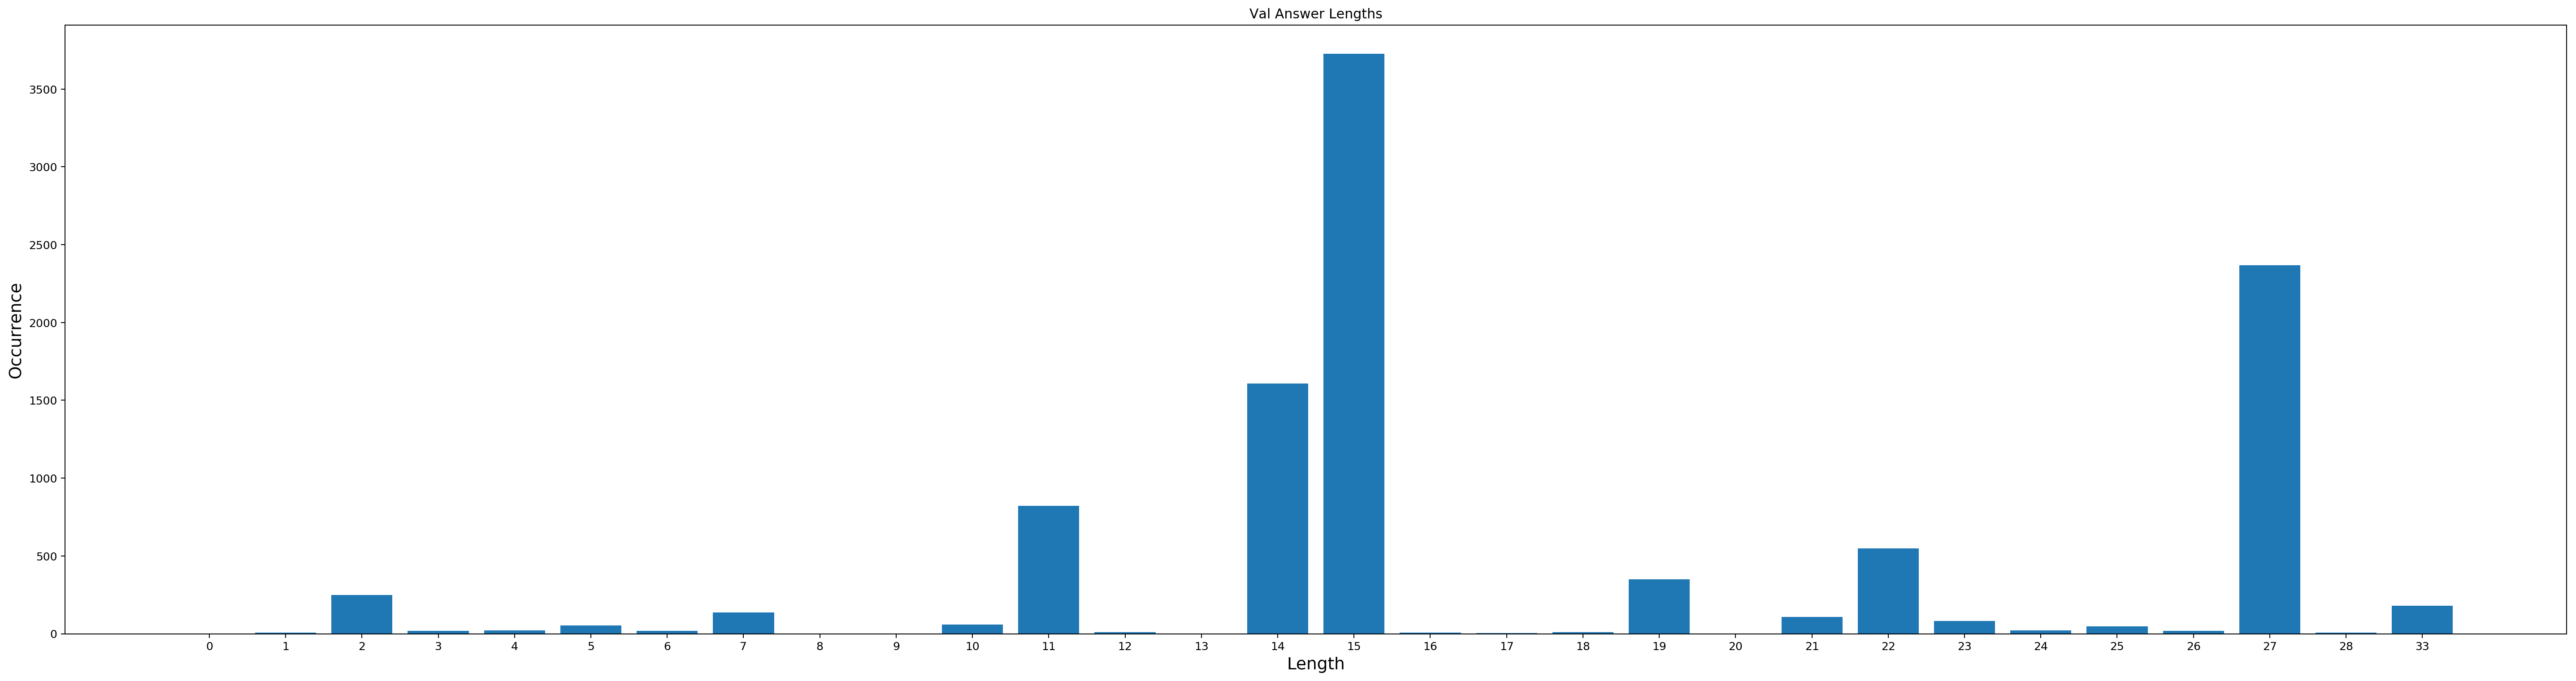

In [16]:
bar('Val Answer Lengths', val_answer_lengths, fig_size=(40, 10))

In [17]:
stats(val_answer_lengths)

(0, 33, 14.5, 14.633333333333333)